<a href="https://colab.research.google.com/github/mesi514/Siddhi-Katariya-Datacket-Internship/blob/main/Solution_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
from google.colab import files

In [ ]:
data = files.upload()

Saving AMZN.csv to AMZN.csv


In [ ]:
data = pd.read_csv("AMZN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-17,90.578003,92.584503,89.869003,92.196503,92.196503,113658000
1,2018-07-18,92.400002,92.944000,91.563499,92.146004,92.146004,97238000
2,2018-07-19,91.473000,92.050003,90.563499,90.648499,90.648499,93538000
3,2018-07-20,91.250504,91.741997,90.502998,90.684998,90.684998,77688000
4,2018-07-23,90.610497,90.949997,88.499496,90.099998,90.099998,77770000
...,...,...,...,...,...,...,...
1002,2022-07-11,114.080002,114.300003,110.870003,111.750000,111.750000,53487600
1003,2022-07-12,112.160004,113.230003,108.339996,109.220001,109.220001,54280300
1004,2022-07-13,107.029999,111.779999,106.010002,110.400002,110.400002,61353800
1005,2022-07-14,110.239998,111.180000,107.580002,110.629997,110.629997,51163100


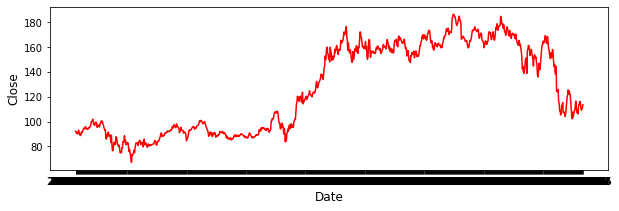

In [ ]:
plt.figure(figsize=(10,3))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.plot(data.Date, data.Close,color='red')

Creating a new Dataframe and Training data

In [ ]:
# 1. Filter out the closing market price data
close_data = data.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=10)

Epoch 1/10
645/645 [==============================] - 20s 27ms/step - loss: 0.0039
Epoch 2/10
645/645 [==============================] - 17s 27ms/step - loss: 0.0022
Epoch 3/10
645/645 [==============================] - 18s 28ms/step - loss: 0.0015
Epoch 4/10
645/645 [==============================] - 17s 27ms/step - loss: 0.0013
Epoch 5/10
645/645 [==============================] - 17s 27ms/step - loss: 0.0013
Epoch 6/10
645/645 [==============================] - 17s 27ms/step - loss: 9.2133e-04
Epoch 7/10
645/645 [==============================] - 17s 27ms/step - loss: 9.8986e-04
Epoch 8/10
645/645 [==============================] - 17s 27ms/step - loss: 8.4337e-04
Epoch 9/10
645/645 [==============================] - 17s 27ms/step - loss: 8.5173e-04
Epoch 10/10
645/645 [==============================] - 18s 27ms/step - loss: 8.1322e-04


Testing the model on testing data

In [ ]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Make Predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


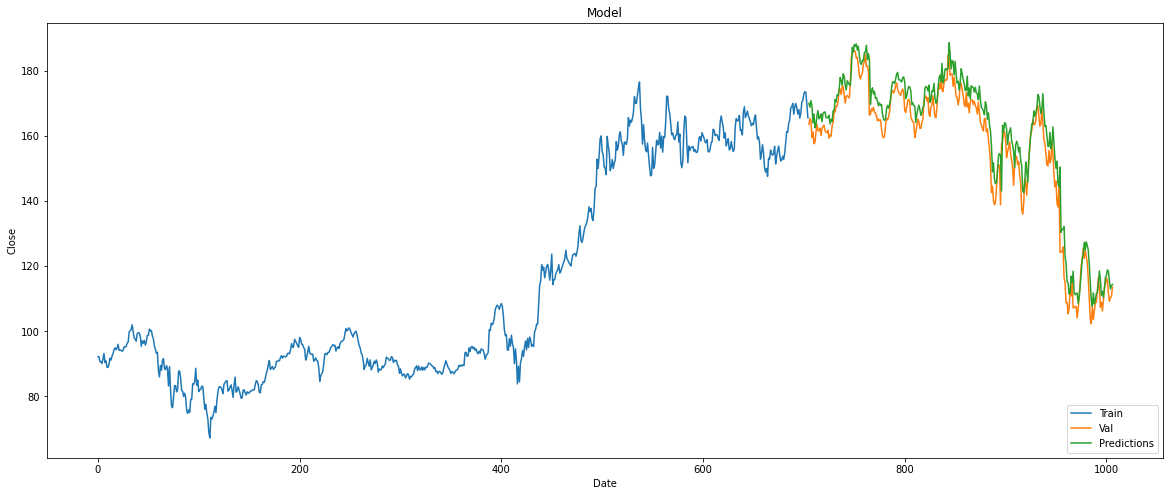

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
 
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [ ]:
table = pd.DataFrame(data=valid, columns=['Close','Predictions'])
table

,Close,Predictions
705,163.526993,170.032654
706,165.318497,168.804901
707,164.580505,170.841553
708,159.524506,169.236679
709,161.195496,164.006851
...,...,...
1002,111.750000,118.346199
1003,109.220001,115.178932
1004,110.400002,113.001122
1005,110.629997,114.040665
